# Predicting Cyber-attacks
Cyber-attacks are an important issue faced by all organizations. Securing information systems is critical. Organizations should be able to understand the ecosystem and predict attacks. Predicting attacks quantitatively should be part of risk management. The cost impact due to worms, viruses, or other malicious software is significant. This project proposes an analytical model to predict the impact of an attack based on significant factors that influence cyber security.

In our project, there are several attempts of cyber attacks at different machines (Destination IP) that we will be predicting to avoid in future.

source: https://www.kaggle.com/iamranjann/exploring-attacks-cybersec/data


### Importing all necessary libraries

Below code snippet imports all the python libraries required for this project

In [1]:
# Importing all necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest
from datetime import datetime, timedelta
from sklearn.utils import resample
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

We are going to read a .csv file that contains information about different cybersecurity events that have occurred in a specific time frame. In this way, the following attributes are available in the data:

**Time:** start and end date of the attack in timestamp format.<br>
**Attack category:** type of registered cybersecurity attack.<br>
**Attack subcategory:** subcategory of the type of cybersecurity attack registered<br>
**Protocol:** protocol used for the attack.<br>
**Source IP:** IPv4 address where the attack came from.<br>
**Source Port:** logical port where the attack came from.<br>
**DestinationIP:** destination IPv4 address.<br>
**Destination Port:** logical destination port.<br>
**Attack Name:** technical name for the cybersecurity attack.<br>
**Attack Reference:** Common Vulnerabilities and Exposures (CVE) reference of the type of cybersecurity attack.<br>

**The following types of attacks are included in the dataset:**<br>

**Reconnaissance:** it can be defined as a probe in which the attacker collects information about a computer network to evade its security controls.<br>
**Fuzzers:** the attacker attempts to uncover security loopholes in a program, operating system, or network by feeding it with massive random data entry to block it.<br>
**Analysis:** a type of intrusion that penetrates web applications through ports (for example, port scans), emails (for example, spam), and web scripts (for example, HTML files).<br>
**Backdoor:** a stealthy technique to avoid normal authentication to ensure unauthorized remote access to a device.<br>
**Exploit:** asequence of instructions that exploits a flaw (vulnerability) caused by involuntary or unsuspected behavior on a host or network.<br>
**Generic:** a technique that attempts against block encryption using a hash function for collision regardless of encryption settings.<br>
**Shellcode:** the attacker penetrates a small piece of code from a shell to control the compromised machine.<br>
**Worm:** the attack replicates malicious script to spread it to other computers. Often, it uses a computer network to spread, depending on security flaws in the destination computer.<br>
**DoS:** an intrusion that disrupts computer resources, often through memory, to be extremely busy to prevent unauthorized requests from accessing a device.<br>

### Importing csv files

Imported two csv files from Kaggle - "Cybersecurity_attacks.csv" and "TCP-ports.csv" using pandas library

In [2]:
# Importing messy data files from local computer and creating dataframes for individual csv files
cyberattack_df = pd.read_csv('Cybersecurity_attacks.csv', encoding='utf-8')
tcp_ports_df = pd.read_csv('TCP-ports.csv', encoding='utf-8')

## Data Cleaning and Preparation
Cleaning the data from the files imported - first by cleaning "Cybersecurity_attacks.csv" file and then "TCP-ports.csv"

In [3]:
# Checking the column names in Cybersecurity_attacks.csv
cyberattack_df.columns

Index(['Attack category', 'Attack subcategory', 'Protocol', 'Source IP',
       'Source Port', 'Destination IP', 'Destination Port', 'Attack Name',
       'Attack Reference', '.', 'Time'],
      dtype='object')

In [4]:
# Understanding data types of each columns of Cybersecurity_attacks.csv
cyberattack_df.dtypes

Attack category       object
Attack subcategory    object
Protocol              object
Source IP             object
Source Port            int64
Destination IP        object
Destination Port       int64
Attack Name           object
Attack Reference      object
.                     object
Time                  object
dtype: object

In [5]:
# Displaying all data in Cybersecurity_attacks.csv
cyberattack_df

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418
...,...,...,...,...,...,...,...,...,...,...,...
178026,Generic,IXIA,udp,175.45.176.0,72349,149.171.126.12,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,.,1424224338-1424224338
178027,Exploits,Browser,sep,175.45.176.3,67647,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,.,1424249567-1424249567
178028,Exploits,Office Document,tcp,175.45.176.0,78359,149.171.126.13,110,Microsoft Excel SxView Memory Corruption (POP3...,CVE 2009-3128 (http://cve.mitre.org/cgi-bin/cv...,.,1424219921-1424219923
178029,Exploits,Browser,tcp,175.45.176.2,68488,149.171.126.19,80,Internet Explorer createTextRange() Code Execu...,CVE 2006-1359 (http://cve.mitre.org/cgi-bin/cv...,.,1424247789-1424247789


In [6]:
# Understanding number of rows and columns
cyberattack_df.shape

(178031, 11)

In [7]:
# Finding null values in data set
cyberattack_df.isnull().sum()

Attack category           0
Attack subcategory     4192
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
.                         0
Time                      0
dtype: int64

#### As there are 2 columns having null data i.e. "Attack category" and "Attack Reference" we will clean in the following way:
1. Coverting all Null values in Attack category to Not Registered
2. Dropping the column Attack Reference as it will not help further in our Prediction model

In [8]:
# Adding Not Registered in null data of Attack subcategory
cyberattack_df["Attack subcategory"] = cyberattack_df["Attack subcategory"].fillna("Not Registered")
# print
cyberattack_df

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418
...,...,...,...,...,...,...,...,...,...,...,...
178026,Generic,IXIA,udp,175.45.176.0,72349,149.171.126.12,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,.,1424224338-1424224338
178027,Exploits,Browser,sep,175.45.176.3,67647,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,.,1424249567-1424249567
178028,Exploits,Office Document,tcp,175.45.176.0,78359,149.171.126.13,110,Microsoft Excel SxView Memory Corruption (POP3...,CVE 2009-3128 (http://cve.mitre.org/cgi-bin/cv...,.,1424219921-1424219923
178029,Exploits,Browser,tcp,175.45.176.2,68488,149.171.126.19,80,Internet Explorer createTextRange() Code Execu...,CVE 2006-1359 (http://cve.mitre.org/cgi-bin/cv...,.,1424247789-1424247789


#### Cleaning column data having inconsistencies

1. Spaces in data
2. Inconsistent case
3. Data seperated with special characters
4. Converting data

In [9]:
# Removing spaces in Attack Category
cyberattack_df['Attack category']=cyberattack_df['Attack category'].str.strip()

#renamed backdoors to backdoor
cyberattack_df['Attack category'].replace("Backdoors","Backdoor", inplace = True)

# Counting unique data in column Attack Category
cyberattack_df['Attack category'].value_counts()

Exploits          69588
Fuzzers           34361
DoS               25117
Reconnaissance    20571
Generic           20296
Backdoor           4451
Analysis           1933
Shellcode          1541
Worms               173
Name: Attack category, dtype: int64

In [10]:
# Removing spaces in column "Attack subcategory"
cyberattack_df['Attack subcategory']=cyberattack_df['Attack subcategory'].str.strip()

# Counting unique data in column "Attack subcategory"
cyberattack_df['Attack subcategory'].value_counts()

Miscellaneous                      39480
IXIA                               19435
OSPF                               13645
ICMP                               11462
SMB                                 9660
                                   ...  
Dameware                               6
Common Unix Print System (CUPS)        6
Unix 'r' Service                       6
NTP                                    2
CUPS                                   1
Name: Attack subcategory, Length: 106, dtype: int64

In [11]:
# Removing spaces in column "Protocol"
cyberattack_df['Protocol']=cyberattack_df['Protocol'].str.strip()

# Converting all data from column "Protocol" to Uppercase
cyberattack_df['Protocol']=cyberattack_df['Protocol'].str.upper()

# Counting unique data in column "Protocol"
cyberattack_df['Protocol'].value_counts()

TCP           57778
UDP           27679
UNAS          25251
OSPF           9736
SCTP           4444
              ...  
ISO-IP          393
IPV6-OPTS       393
TTP             392
SMP             392
SPRITE-RPC      392
Name: Protocol, Length: 129, dtype: int64

In [12]:
# Making column "Attack Name" readable
attack_subcategory_df=cyberattack_df['Attack Name'].str.split("(",n=1,expand=True)

# making separate first name column from new data frame
cyberattack_df['Attack Name Split']= attack_subcategory_df[0]
  
# making separate last name column from new data frame
cyberattack_df['Attack Name Misc']= attack_subcategory_df[1]
  
# Dropping old Name columns
cyberattack_df.drop(columns =["Attack Name"], inplace = True)
  
# df display
cyberattack_df

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Reference,.,Time,Attack Name Split,Attack Name Misc
0,Reconnaissance,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,-,.,1421927414-1421927416,Domino Web Server Database Access: /doladmin.nsf,https://strikecenter.bpointsys.com/bps/strikes...
1,Exploits,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,Solaris rwalld Format String Vulnerability,https://strikecenter.bpointsys.com/bps/strikes...
2,Exploits,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,Windows Metafile,WMF) SetAbortProc() Code Execution [009] (http...
3,Exploits,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,HP Data Protector Backup,https://strikecenter.bpointsys.com/bps/strikes...
4,Exploits,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,Cisco IOS HTTP Authentication Bypass Level 64,https://strikecenter.bpointsys.com/bps/strikes...
...,...,...,...,...,...,...,...,...,...,...,...,...
178026,Generic,IXIA,UDP,175.45.176.0,72349,149.171.126.12,53,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,.,1424224338-1424224338,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,https://strikecenter.bpointsys.com/bps/strikes...
178027,Exploits,Browser,SEP,175.45.176.3,67647,149.171.126.18,0,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,.,1424249567-1424249567,Persits XUpload ActiveX Method MakeHttpRequest...,https://strikecenter.bpointsys.com/bps/strikes...
178028,Exploits,Office Document,TCP,175.45.176.0,78359,149.171.126.13,110,CVE 2009-3128 (http://cve.mitre.org/cgi-bin/cv...,.,1424219921-1424219923,Microsoft Excel SxView Memory Corruption,POP3) (https://strikecenter.bpointsys.com/bps/...
178029,Exploits,Browser,TCP,175.45.176.2,68488,149.171.126.19,80,CVE 2006-1359 (http://cve.mitre.org/cgi-bin/cv...,.,1424247789-1424247789,Internet Explorer createTextRange,) Code Execution Variant 3 (https://strikecent...


In [13]:
# Spliting Time data
cyberattack_df[['Start time','End time']] = cyberattack_df['Time'].str.split('-',expand=True)

# print
cyberattack_df

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Reference,.,Time,Attack Name Split,Attack Name Misc,Start time,End time
0,Reconnaissance,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,-,.,1421927414-1421927416,Domino Web Server Database Access: /doladmin.nsf,https://strikecenter.bpointsys.com/bps/strikes...,1421927414,1421927416
1,Exploits,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,Solaris rwalld Format String Vulnerability,https://strikecenter.bpointsys.com/bps/strikes...,1421927415,1421927415
2,Exploits,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,Windows Metafile,WMF) SetAbortProc() Code Execution [009] (http...,1421927416,1421927416
3,Exploits,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,HP Data Protector Backup,https://strikecenter.bpointsys.com/bps/strikes...,1421927417,1421927417
4,Exploits,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,Cisco IOS HTTP Authentication Bypass Level 64,https://strikecenter.bpointsys.com/bps/strikes...,1421927418,1421927418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178026,Generic,IXIA,UDP,175.45.176.0,72349,149.171.126.12,53,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,.,1424224338-1424224338,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,https://strikecenter.bpointsys.com/bps/strikes...,1424224338,1424224338
178027,Exploits,Browser,SEP,175.45.176.3,67647,149.171.126.18,0,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,.,1424249567-1424249567,Persits XUpload ActiveX Method MakeHttpRequest...,https://strikecenter.bpointsys.com/bps/strikes...,1424249567,1424249567
178028,Exploits,Office Document,TCP,175.45.176.0,78359,149.171.126.13,110,CVE 2009-3128 (http://cve.mitre.org/cgi-bin/cv...,.,1424219921-1424219923,Microsoft Excel SxView Memory Corruption,POP3) (https://strikecenter.bpointsys.com/bps/...,1424219921,1424219923
178029,Exploits,Browser,TCP,175.45.176.2,68488,149.171.126.19,80,CVE 2006-1359 (http://cve.mitre.org/cgi-bin/cv...,.,1424247789-1424247789,Internet Explorer createTextRange,) Code Execution Variant 3 (https://strikecent...,1424247789,1424247789


In [14]:
# Type casting String data in Start time and End time to DateTime object
cyberattack_df['Start time'] = pd.to_datetime(cyberattack_df['Start time'], unit='s')
cyberattack_df['End time'] = pd.to_datetime(cyberattack_df['End time'], unit='s')

# Finding Duration by subtracting End time with Start time in minutes
cyberattack_df['Duration (secs)'] = ((cyberattack_df['End time'] - cyberattack_df['Start time']).dt.seconds).astype(int)

# print
cyberattack_df

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Reference,.,Time,Attack Name Split,Attack Name Misc,Start time,End time,Duration (secs)
0,Reconnaissance,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,-,.,1421927414-1421927416,Domino Web Server Database Access: /doladmin.nsf,https://strikecenter.bpointsys.com/bps/strikes...,2015-01-22 11:50:14,2015-01-22 11:50:16,2
1,Exploits,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,Solaris rwalld Format String Vulnerability,https://strikecenter.bpointsys.com/bps/strikes...,2015-01-22 11:50:15,2015-01-22 11:50:15,0
2,Exploits,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,Windows Metafile,WMF) SetAbortProc() Code Execution [009] (http...,2015-01-22 11:50:16,2015-01-22 11:50:16,0
3,Exploits,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,HP Data Protector Backup,https://strikecenter.bpointsys.com/bps/strikes...,2015-01-22 11:50:17,2015-01-22 11:50:17,0
4,Exploits,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,Cisco IOS HTTP Authentication Bypass Level 64,https://strikecenter.bpointsys.com/bps/strikes...,2015-01-22 11:50:18,2015-01-22 11:50:18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178026,Generic,IXIA,UDP,175.45.176.0,72349,149.171.126.12,53,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,.,1424224338-1424224338,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,https://strikecenter.bpointsys.com/bps/strikes...,2015-02-18 01:52:18,2015-02-18 01:52:18,0
178027,Exploits,Browser,SEP,175.45.176.3,67647,149.171.126.18,0,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,.,1424249567-1424249567,Persits XUpload ActiveX Method MakeHttpRequest...,https://strikecenter.bpointsys.com/bps/strikes...,2015-02-18 08:52:47,2015-02-18 08:52:47,0
178028,Exploits,Office Document,TCP,175.45.176.0,78359,149.171.126.13,110,CVE 2009-3128 (http://cve.mitre.org/cgi-bin/cv...,.,1424219921-1424219923,Microsoft Excel SxView Memory Corruption,POP3) (https://strikecenter.bpointsys.com/bps/...,2015-02-18 00:38:41,2015-02-18 00:38:43,2
178029,Exploits,Browser,TCP,175.45.176.2,68488,149.171.126.19,80,CVE 2006-1359 (http://cve.mitre.org/cgi-bin/cv...,.,1424247789-1424247789,Internet Explorer createTextRange,) Code Execution Variant 3 (https://strikecent...,2015-02-18 08:23:09,2015-02-18 08:23:09,0


In [15]:
# Displaying columns and rows in TCP-ports.csv 
tcp_ports_df.shape

(6326, 3)

In [16]:
# Understanding number of rows and columns
tcp_ports_df.dtypes

Port            int64
Service        object
Description    object
dtype: object

In [17]:
# Counting unique data in column "Service"
tcp_ports_df['Service'].value_counts()

vrml-multi-use    100
x11                64
swx                60
flex-lm            10
satvid-datalnk      5
                 ... 
tunnel              1
adrep               1
lrs-paging          1
sua                 1
tcoflashagent       1
Name: Service, Length: 5458, dtype: int64

It seems TCP-Ports.csv file is pretty cleaned and therefore merging both cleaned files in one data frame

In [18]:
#new data frame - merging 2 data frames on Destination Port and Service columns
csa = pd.merge(cyberattack_df, tcp_ports_df[['Port','Service']], left_on='Destination Port', right_on='Port', how='left')
# print
csa

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Reference,.,Time,Attack Name Split,Attack Name Misc,Start time,End time,Duration (secs),Port,Service
0,Reconnaissance,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,-,.,1421927414-1421927416,Domino Web Server Database Access: /doladmin.nsf,https://strikecenter.bpointsys.com/bps/strikes...,2015-01-22 11:50:14,2015-01-22 11:50:16,2,80.0,http
1,Exploits,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,Solaris rwalld Format String Vulnerability,https://strikecenter.bpointsys.com/bps/strikes...,2015-01-22 11:50:15,2015-01-22 11:50:15,0,NaN,NaN
2,Exploits,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,Windows Metafile,WMF) SetAbortProc() Code Execution [009] (http...,2015-01-22 11:50:16,2015-01-22 11:50:16,0,80.0,http
3,Exploits,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,HP Data Protector Backup,https://strikecenter.bpointsys.com/bps/strikes...,2015-01-22 11:50:17,2015-01-22 11:50:17,0,5555.0,personal-agent
4,Exploits,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,Cisco IOS HTTP Authentication Bypass Level 64,https://strikecenter.bpointsys.com/bps/strikes...,2015-01-22 11:50:18,2015-01-22 11:50:18,0,80.0,http
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178026,Generic,IXIA,UDP,175.45.176.0,72349,149.171.126.12,53,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,.,1424224338-1424224338,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,https://strikecenter.bpointsys.com/bps/strikes...,2015-02-18 01:52:18,2015-02-18 01:52:18,0,53.0,domain
178027,Exploits,Browser,SEP,175.45.176.3,67647,149.171.126.18,0,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,.,1424249567-1424249567,Persits XUpload ActiveX Method MakeHttpRequest...,https://strikecenter.bpointsys.com/bps/strikes...,2015-02-18 08:52:47,2015-02-18 08:52:47,0,0.0,NaN
178028,Exploits,Office Document,TCP,175.45.176.0,78359,149.171.126.13,110,CVE 2009-3128 (http://cve.mitre.org/cgi-bin/cv...,.,1424219921-1424219923,Microsoft Excel SxView Memory Corruption,POP3) (https://strikecenter.bpointsys.com/bps/...,2015-02-18 00:38:41,2015-02-18 00:38:43,2,110.0,pop3
178029,Exploits,Browser,TCP,175.45.176.2,68488,149.171.126.19,80,CVE 2006-1359 (http://cve.mitre.org/cgi-bin/cv...,.,1424247789-1424247789,Internet Explorer createTextRange,) Code Execution Variant 3 (https://strikecent...,2015-02-18 08:23:09,2015-02-18 08:23:09,0,80.0,http


Dropping unwanted columns from the merged data frame which is will not be helpful to predict the Attack on machines

In [19]:
# Dropping unused columns
csa.drop(columns =["Attack Reference", ".", "Time", "Attack Name Misc","Port"], inplace = True)

# print
csa

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name Split,Start time,End time,Duration (secs),Service
0,Reconnaissance,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.nsf,2015-01-22 11:50:14,2015-01-22 11:50:16,2,http
1,Exploits,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability,2015-01-22 11:50:15,2015-01-22 11:50:15,0,NaN
2,Exploits,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile,2015-01-22 11:50:16,2015-01-22 11:50:16,0,http
3,Exploits,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup,2015-01-22 11:50:17,2015-01-22 11:50:17,0,personal-agent
4,Exploits,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64,2015-01-22 11:50:18,2015-01-22 11:50:18,0,http
...,...,...,...,...,...,...,...,...,...,...,...,...
178026,Generic,IXIA,UDP,175.45.176.0,72349,149.171.126.12,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,2015-02-18 01:52:18,2015-02-18 01:52:18,0,domain
178027,Exploits,Browser,SEP,175.45.176.3,67647,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,2015-02-18 08:52:47,2015-02-18 08:52:47,0,NaN
178028,Exploits,Office Document,TCP,175.45.176.0,78359,149.171.126.13,110,Microsoft Excel SxView Memory Corruption,2015-02-18 00:38:41,2015-02-18 00:38:43,2,pop3
178029,Exploits,Browser,TCP,175.45.176.2,68488,149.171.126.19,80,Internet Explorer createTextRange,2015-02-18 08:23:09,2015-02-18 08:23:09,0,http


Saving cleaned data frame in csv file called - Cyberattack_cleaned_data.csv

In [20]:
# Saving cleaned data frame
csa.to_csv('Cyberattack_cleaned_data.csv')






## Data Exploration

Exploring cleaned data frame "csa" in order to understand the pattern of cyber-attacks in each category with the help of following questions:

1.Most frequent Attack name based on Attack Category

2.During what time of a day there were most attacks (Attack category, Duration)

3.Most attack on destination IP (Attack category, Destination IP)

4.Exploring further relationship between the time (start and end time) and attacks, Destination IP that were executed

And finally, predicting which source IP, destination IP had most attacks (Attack category, source IP, destination IP)

In [21]:
# Describing the numerical data in the csa data frame but 
# Source Port, Destination Port are considered as Categorial data. 
# Only Duration is a valid numerical data.
csa.describe()

,Source Port,Destination Port,Duration (secs)
count,178031.000000,178031.000000,178031.000000
mean,16464.037252,1297.522769,2.345372
std,22872.732950,7446.794928,9.322229
min,0.000000,-1199.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,34558.500000,80.000000,1.000000
max,79999.000000,65535.000000,60.000000


### Normalization, skeweness and kurtoises

As our target variable is "Attack category" which contains the nominal data and therefore we cannot perform normalization, skeweness and kurtoises in our dataset.

### Plotting some meaningful graphs to visualize and find patterns in the dataset

#### 1. Most frequent Attack name based on Attack Category

From the count & graph below, it is clear that "Exploits" had the highest number of attacks on the machines. Let us further explore the data set.

Text(0.5, 1.0, 'Number of attacks per Attack caterogy')

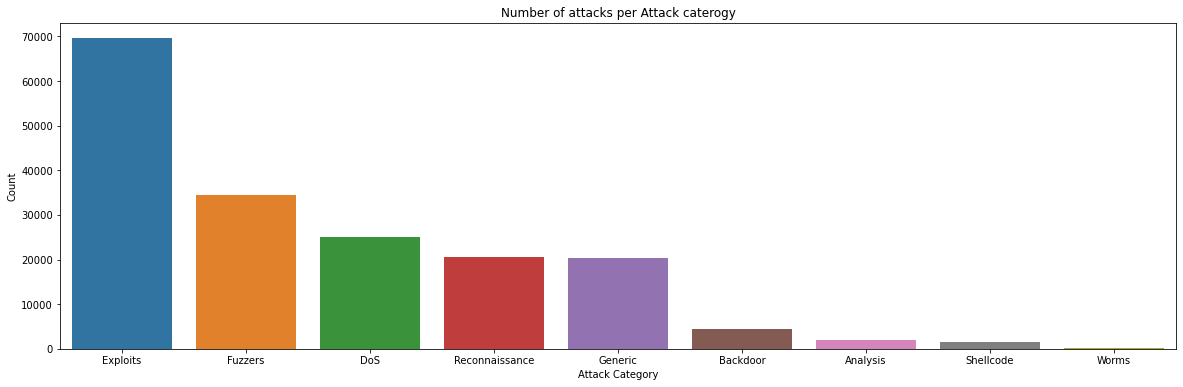

In [22]:
# Plotting number of attacks
plt.figure(figsize=(20,6))
sns.barplot(x=csa['Attack category'].value_counts().index,y=csa['Attack category'].value_counts())
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Number of attacks per Attack caterogy')


Trying to also exlpore Attack subcategory and is found that "Miscellaneous" were at the peak from sub-category. Therefore, we will remove it as this will not be required for our prediction model.

In [23]:
# Percentage of Attack subcategory in entire data set
Percent_SubCategory = csa['Attack subcategory'].value_counts()*100/csa['Attack subcategory'].value_counts().sum()

# print
Percent_SubCategory

Miscellaneous                      22.175913
IXIA                               10.916638
OSPF                                7.664396
ICMP                                6.438205
SMB                                 5.426021
                                     ...    
Dameware                            0.003370
Common Unix Print System (CUPS)     0.003370
Unix 'r' Service                    0.003370
NTP                                 0.001123
CUPS                                0.000562
Name: Attack subcategory, Length: 106, dtype: float64

Exploring Destination port with Attack category to know which ports had the highest kind of attack. It is found from the visuzalition below that "Exploits" and "Shellcode" were high where as "Reconnaissance" and "Analysis" were the least.

Text(0.5, 1.0, 'Number of attacks per Destination Port')

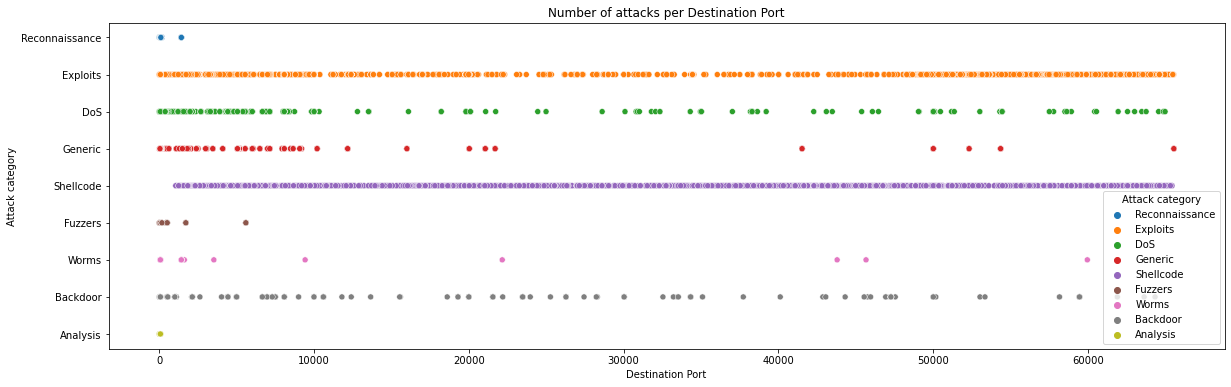

In [24]:
# Plotting destination port with Attack category
plt.figure(figsize=(20,6))
sns.scatterplot(data=csa[csa['Destination Port']>0],x='Destination Port',y='Attack category', hue='Attack category')
plt.xlabel('Destination Port')
plt.ylabel('Attack category')
plt.title('Number of attacks per Destination Port')

##### Result:

"Exploits" and "Miscellaneous" type of cyber category and sub-category were highest respectively.

### 2. During what time of a day there were most attacks (Attack category and Duration)

Exploring cyber-attacks against duration (secs)

#### 2.1 Understanding the duration of cyber attacks in each category

In [25]:
# Grouping Attack category against the duration
x = csa.groupby(csa['Attack category']).mean()
sort = x.sort_values(['Duration (secs)'], ascending=False )
final_x = sort['Duration (secs)']
final_x

Attack category
Backdoor          2.862053
DoS               2.850619
Fuzzers           2.776578
Exploits          2.666796
Reconnaissance    1.582276
Analysis          1.495085
Worms             1.283237
Generic           0.787741
Shellcode         0.375730
Name: Duration (secs), dtype: float64

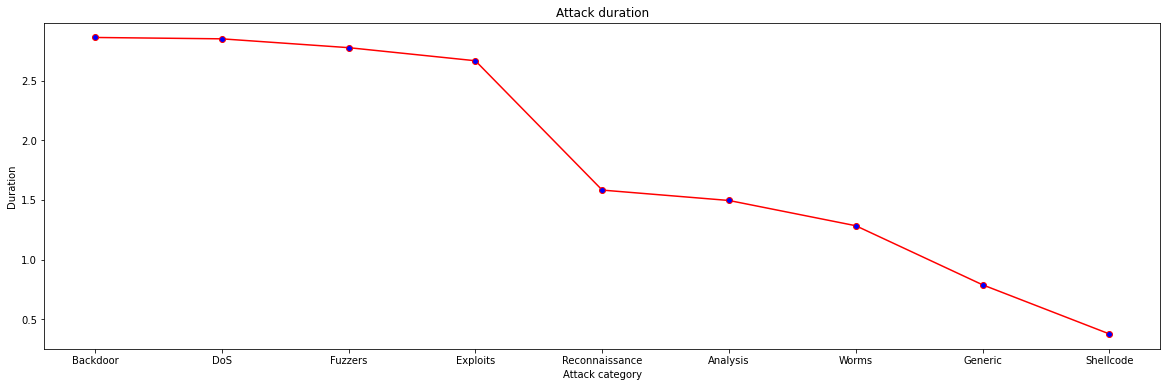

In [26]:
# Plotting Attack category vs Duration

plt.figure(figsize=(20,6))
plt.plot(final_x, color = 'r', marker = 'o', markerfacecolor='b')
plt.title('Attack duration')
plt.xlabel('Attack category')
plt.ylabel('Duration')
plt.show()

#### 2.2 Duration Analysis

From the visualization below, Two types of attacks that do not record times greater than 20 seconds are the shellcode and the worms

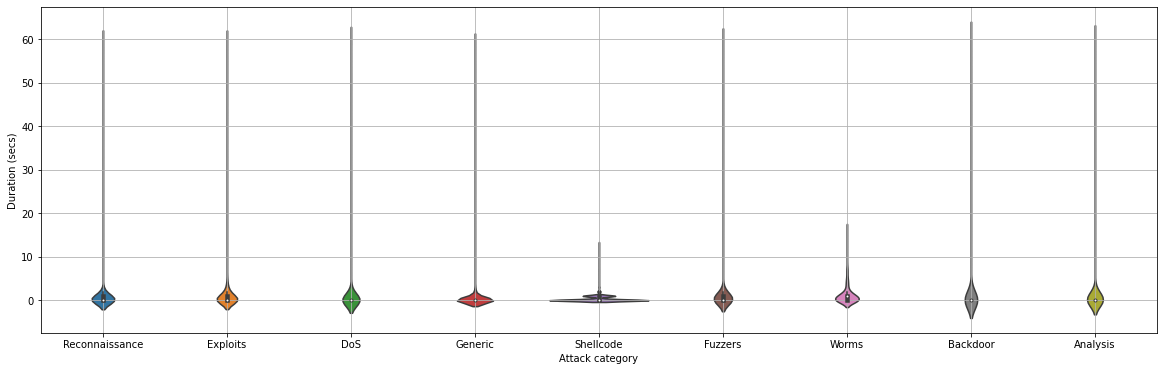

In [27]:
# Visualizing the duration of attacks with the help of more detailed plot
plt.figure(figsize=(20,6))
sns.violinplot(x='Attack category', y='Duration (secs)', data= csa, showfliers = False)
plt.grid(True)
plt.show()

##### Result:

"Backdoor" was the Attack type that was impacted for the highest time in seconds, almost 2.8 seconds

### 3. Most attack on destination IP (Attack category, destination IP)

Exploring most attacked destination IP address

The most attacked Destination machine is "149.171.126.17". Therefore we will explore the same IP further.

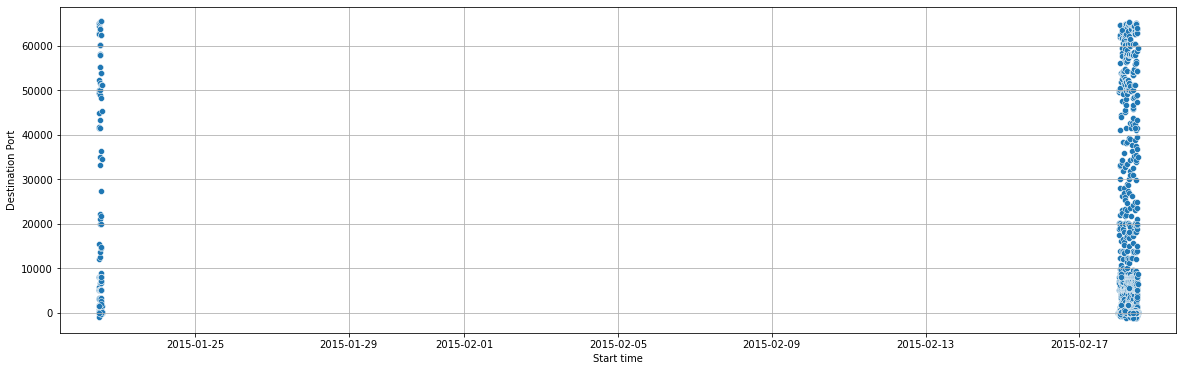

In [28]:
# Visualizing most vulnerable Destination IP "149.171.126.17" against Start time and End time
plt.figure(figsize=(20,6))
sns.scatterplot(x=csa[csa['Destination IP']=='149.171.126.17']['Start time'], y=csa[csa['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=csa['Start time'].min()-timedelta(days=1),right=csa['Start time'].max()+timedelta(days=1))
plt.grid(True)
plt.show()

It can be seen from the above visualization that most of the attacks happened after Feb 17,2015 for machine "149.171.126.17" ranging with Destination Ports between 0 and 66000

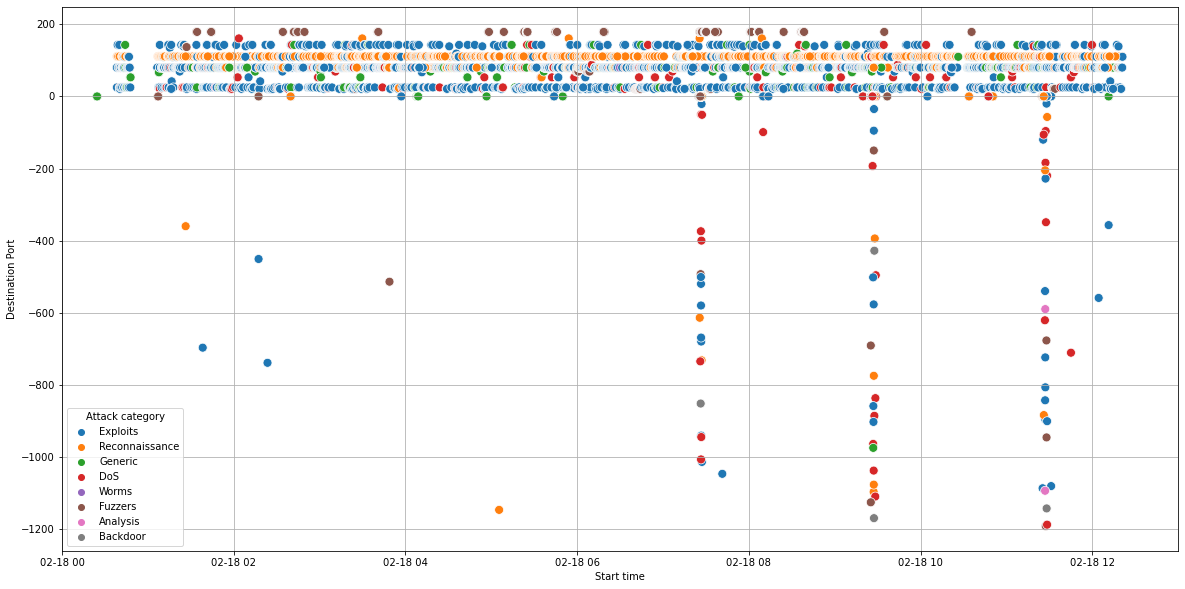

In [31]:
# Understading the pattern of Destination Port against start time of attack by categorizing the type of attack
plt.figure(figsize=(20,10))
sns.scatterplot(x='Start time', y='Destination Port', hue='Attack category', 
                data=csa[(csa['Destination IP']=='149.171.126.17')&(csa['Destination Port']<=200)], 
                s=80)
plt.xlim(left=datetime.strptime('15-02-18 00:00:00', '%y-%m-%d %H:%M:%S'),
         right=datetime.strptime('15-02-18 13:00:00', '%y-%m-%d %H:%M:%S'))
plt.grid(True)
plt.show()

###### Result: 
In fact, there is an evident pattern in the graph in which Ten clear constant trends are perceived on the values 0, 22, 25, 53, 80, 110, 111, 138, 143 and 178 of the y-axis. This pattern corresponds to the very well known ports that provide important TCP and UDP services

### 4. Exploring further relationship between the time (start and end time) and attacks, Destination IP that were executed

In [32]:
#creating heatmap function in order to use it further in our exploration
def heatmap_graph(df, xlabel, ylabel, title):
    plt.figure(figsize=(20,10))
    ax = sns.heatmap(df, cmap="RdPu")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

In [33]:
# Creating Hour column
ccsa = csa.copy()
ccsa['hour'] = ccsa.apply(lambda row: '0'*(2-len(str(row['Start time'].hour)))+str(row['Start time'].hour)+':00:00', axis=1)

# Print first 10 rows
ccsa[:10]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name Split,Start time,End time,Duration (secs),Service,hour
0,Reconnaissance,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.nsf,2015-01-22 11:50:14,2015-01-22 11:50:16,2,http,11:00:00
1,Exploits,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability,2015-01-22 11:50:15,2015-01-22 11:50:15,0,NaN,11:00:00
2,Exploits,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile,2015-01-22 11:50:16,2015-01-22 11:50:16,0,http,11:00:00
3,Exploits,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup,2015-01-22 11:50:17,2015-01-22 11:50:17,0,personal-agent,11:00:00
4,Exploits,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64,2015-01-22 11:50:18,2015-01-22 11:50:18,0,http,11:00:00
5,DoS,Miscellaneous,TCP,175.45.176.0,39500,149.171.126.15,80,Cisco DCP2100 SADownStartingFrequency Denial o...,2015-01-22 11:50:19,2015-01-22 11:50:19,0,http,11:00:00
6,DoS,Miscellaneous,TCP,175.45.176.0,23910,149.171.126.15,80,Cisco DCP2100 SADownStartingFrequency Denial o...,2015-01-22 11:50:19,2015-01-22 11:50:22,3,http,11:00:00
7,Generic,IXIA,TCP,175.45.176.0,29309,149.171.126.14,3000,Alt-N_MDaemon_WorldClient_Service_Memory_Corru...,2015-01-22 11:50:20,2015-01-22 11:50:20,0,remoteware-cl,11:00:00
8,Exploits,Browser,TCP,175.45.176.0,61089,149.171.126.18,80,Microsoft Internet Explorer Frameset Memory Co...,2015-01-22 11:50:21,2015-01-22 11:50:21,0,http,11:00:00
9,Exploits,Browser,TCP,175.45.176.0,4159,149.171.126.18,80,Microsoft Internet Explorer Frameset Memory Co...,2015-01-22 11:50:21,2015-01-22 11:50:22,1,http,11:00:00


In [34]:
# Attack category counts per hour
ccsa_1 = pd.pivot_table(ccsa, 
                        values='Attack Name Split', 
                        index=['hour'], columns=['Attack category'], aggfunc='count')
ccsa_1

Attack category,Analysis,Backdoor,DoS,Exploits,Fuzzers,Generic,Reconnaissance,Shellcode,Worms
hour,,,,,,,,,
00:00:00,3,16,133,554,397,62,180,20,3
01:00:00,188,1169,2701,6845,4567,1785,1837,107,15
02:00:00,71,102,644,2922,2032,1051,1041,116,10
03:00:00,233,62,3832,9953,2813,1536,2801,116,17
04:00:00,66,88,629,2836,2134,1376,1063,117,10
05:00:00,202,660,3127,9571,2607,1883,1787,112,15
06:00:00,87,96,658,3017,2114,1020,1034,121,10
07:00:00,182,590,3458,6278,2452,2130,1893,120,15
08:00:00,74,115,673,2999,2101,1106,1022,108,11


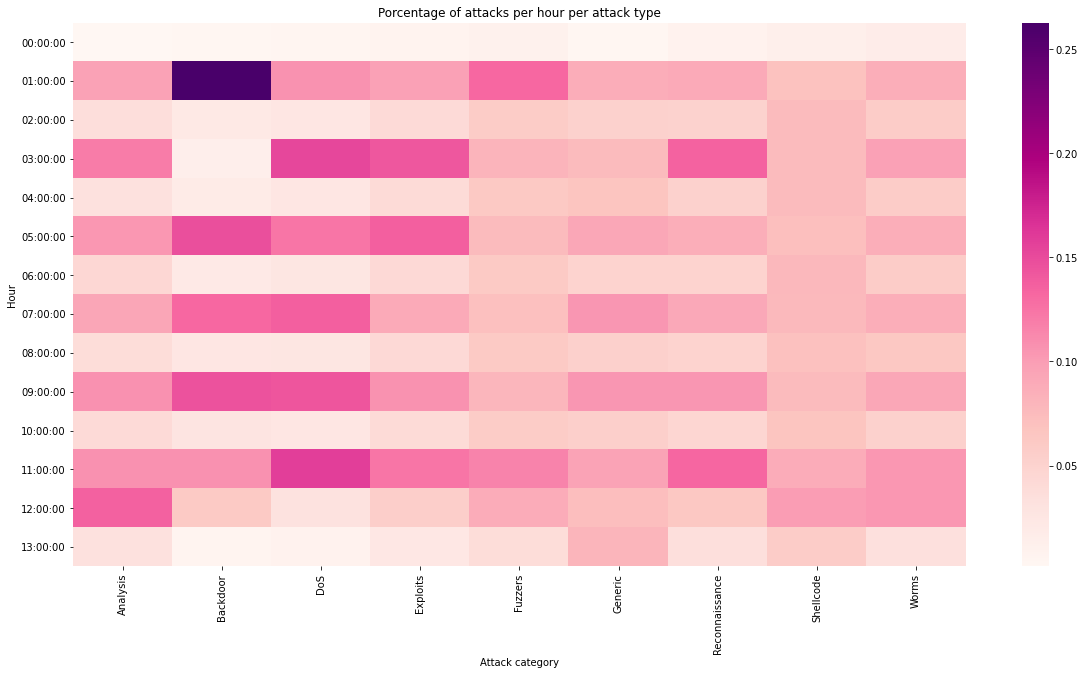

In [36]:
# Heatmap of Percentage of attacks per hours per type
heatmap_graph(df = ccsa_1/ccsa_1.sum(), xlabel = 'Attack category', ylabel = 'Hour', title = 'Porcentage of attacks per hour per attack type')

##### Result:

We notice that there's a pattern in the attacks, especially for "Denial of Service (DoS)" and "Exploit" attacks. The attacks were made with more intensity at odd hours in a day.

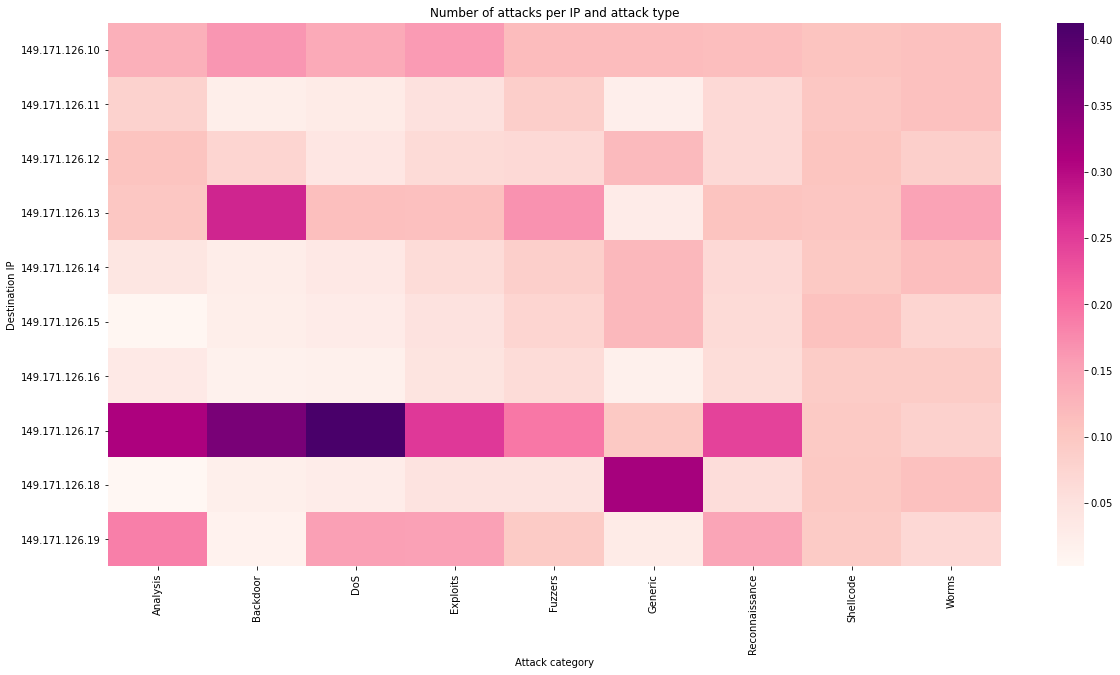

In [37]:
# Heatmap of the number of attacks per Destination IP and its respective Attack category
ccsa_3 = pd.pivot_table(ccsa, 
                           values='Attack Name Split', 
                           index=['Destination IP'], columns=['Attack category'], aggfunc='count')
heatmap_graph(df = ccsa_3/ccsa_3.sum(), xlabel = 'Attack category', ylabel = 'Destination IP', title = 'Number of attacks per IP and attack type')

##### Result:
The most vulnerable machine address is - "149.171.126.17". It is found that "Denial of Services (DoS)", "Exploits" and "Backdoor" attacks are clearly targeted towards specific Machines/Servers.

## Correlation and Feature Engineering

In order to understand the relationship of different columns in our data set we performed and selecting best features out of it, we used 3 methods - Pearson correlation, Embedded method and Feature importance.

### 1. Pearson correlation

In [38]:
# Executing correlation function using Pearson method on the numerical dataset. 
# But Source and Destination Port are considered to be Nominal data.
# Only Duration (secs) is numerical data.
corrmat=csa.corr(method='pearson')
corrmat

,Source Port,Destination Port,Duration (secs)
Source Port,1.000000,0.126733,-0.071335
Destination Port,0.126733,1.000000,-0.026816
Duration (secs),-0.071335,-0.026816,1.000000


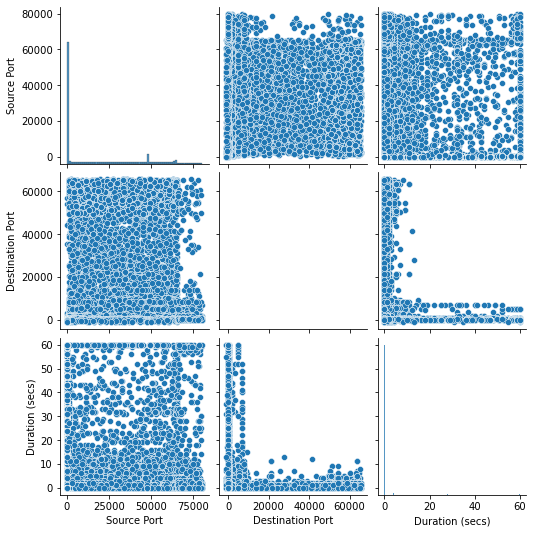

In [39]:
# Creating pairplot
sns.pairplot(csa[['Source Port','Destination Port','Duration (secs)']])

Creating dummy variables for columns "Attack category"

In [40]:
# Creating dummies for only "Attack category" to understand the relationship with other columns in dataframe csa
df_dummies = pd.get_dummies(csa, columns=['Attack category'])
# display(df_dummies)

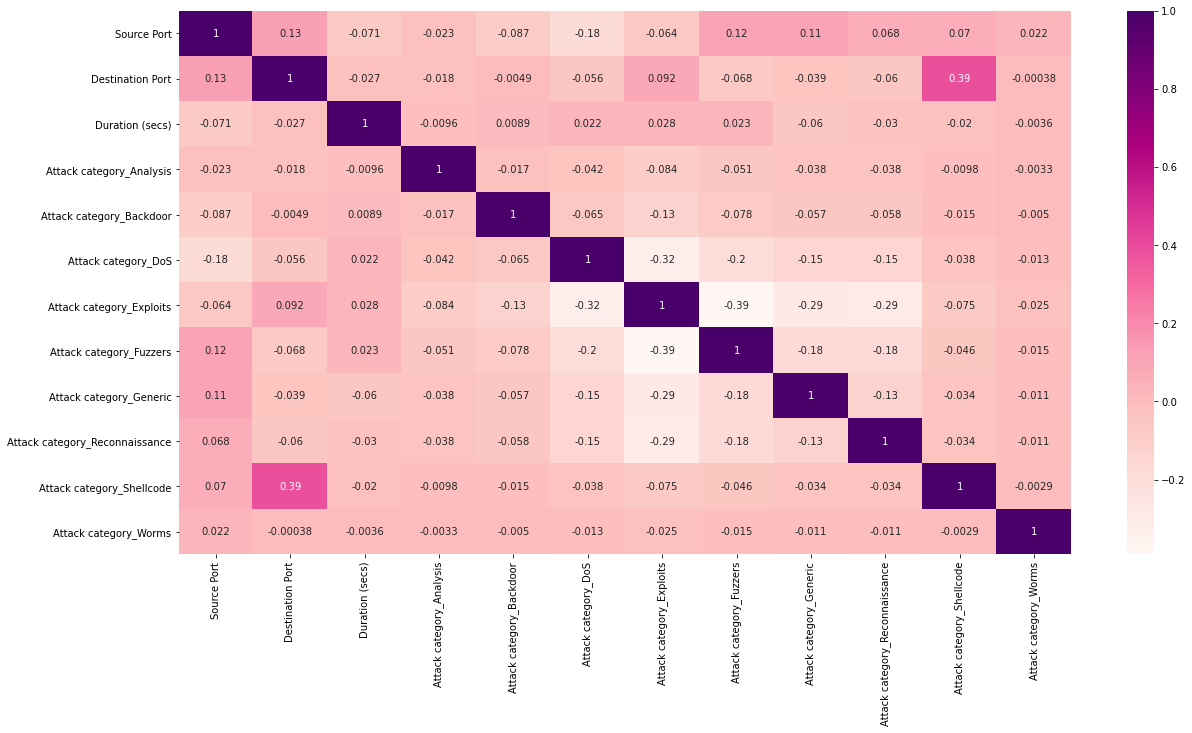

In [41]:
# Plotting correlation heatmap for dummies of "Attack category" 
plt.figure(figsize=(20,10))
sns.heatmap(df_dummies.corr(method='pearson'), annot=True, cmap="RdPu")
plt.show()

##### Result:

By analysing the above heatmap we concluded that destination port is having the highest correlation value of 0.39 to particular attack category named shellcode. As rest all the correlation values are very small, so we have selected only destination port as the only feature from Pearson method.

#### Creating dummy variables for Attack category, Source IP and Destination IP in order to predict the most attacks on a particular machine.

Finding corelation between Source and Destination IP per Attack type and therefore using Pearson method to understand the corelation between them.

#### As we created dummies, let us implement Pearson method on independent and target columns from corelation_dummy dataframe.

In [45]:
# Dropping all the unwanted columns
corelation_dummy.drop(columns = ['Attack subcategory','Source Port','Destination Port','Protocol','Service','Attack Name Split','Start time', 'End time','Duration (secs)'], inplace = True)
corelation_dummy

,Attack category_Analysis,Attack category_Backdoor,Attack category_DoS,Attack category_Exploits,Attack category_Fuzzers,Attack category_Generic,Attack category_Reconnaissance,Attack category_Shellcode,Attack category_Worms,Source IP_175.45.176.0,...,Destination IP_149.171.126.10,Destination IP_149.171.126.11,Destination IP_149.171.126.12,Destination IP_149.171.126.13,Destination IP_149.171.126.14,Destination IP_149.171.126.15,Destination IP_149.171.126.16,Destination IP_149.171.126.17,Destination IP_149.171.126.18,Destination IP_149.171.126.19
0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178026,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
178027,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
178028,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
178029,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
X = corelation_dummy.iloc[:,9:22]  #independent columns
y = corelation_dummy.iloc[:,5]    #target column i.e Generic
list(corelation_dummy)

['Attack category_Analysis',
 'Attack category_Backdoor',
 'Attack category_DoS',
 'Attack category_Exploits',
 'Attack category_Fuzzers',
 'Attack category_Generic',
 'Attack category_Reconnaissance',
 'Attack category_Shellcode',
 'Attack category_Worms',
 'Source IP_175.45.176.0',
 'Source IP_175.45.176.1',
 'Source IP_175.45.176.2',
 'Source IP_175.45.176.3',
 'Destination IP_149.171.126.10',
 'Destination IP_149.171.126.11',
 'Destination IP_149.171.126.12',
 'Destination IP_149.171.126.13',
 'Destination IP_149.171.126.14',
 'Destination IP_149.171.126.15',
 'Destination IP_149.171.126.16',
 'Destination IP_149.171.126.17',
 'Destination IP_149.171.126.18',
 'Destination IP_149.171.126.19']

In [47]:
def cor_selector(X, y,num_features):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_features:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X, y,3)
print(str(len(cor_feature)), 'selected features')
print(cor_feature)

3 selected features
['Source IP_175.45.176.2', 'Destination IP_149.171.126.17', 'Destination IP_149.171.126.18']


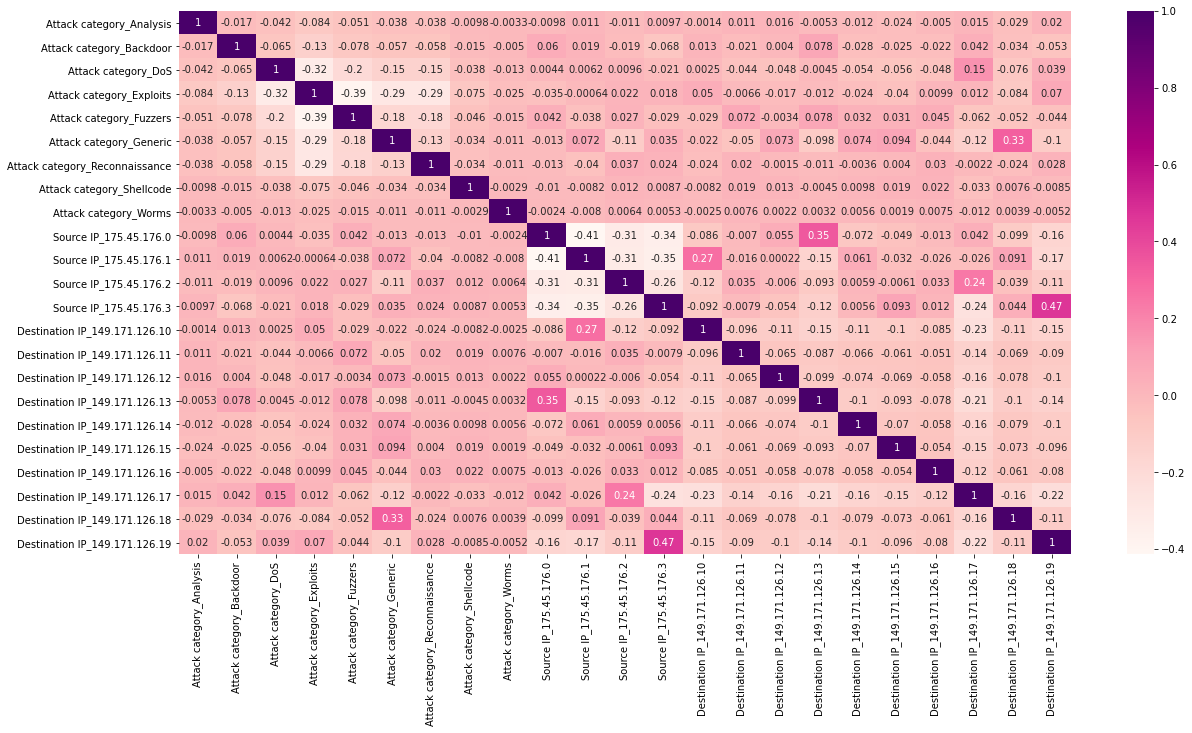

In [48]:
# Corelation between dummy data
corrmat = corelation_dummy.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(corelation_dummy[top_corr_features].corr(),annot=True,cmap="RdPu")

##### Result:
From the heatmap above, it is clear that there's a strong relation between "Generic" and "149.171.126.18" machine.

In [49]:
#Correlation with output variable
cor_target = abs(corrmat["Attack category_Generic"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

Attack category_Generic          1.000000
Destination IP_149.171.126.18    0.325857
Name: Attack category_Generic, dtype: float64

In [50]:
#Correlation with output variable
cor_target = abs(corrmat["Source IP_175.45.176.3"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

Source IP_175.45.176.0           0.342524
Source IP_175.45.176.1           0.348513
Source IP_175.45.176.3           1.000000
Destination IP_149.171.126.19    0.465186
Name: Source IP_175.45.176.3, dtype: float64

### 2. Embedded Method

The features with coefficient = 0 are removed and the rest are taken.
If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [51]:
# Using Embedded method to get the best feature out of X and y.
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)


Best alpha using built-in LassoCV: 0.006353
Best score using built-in LassoCV: 0.119961


In [52]:
# Selecting best features and eliminating others
print("Lasso picked " + str(sum(coef != 0)) +
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")


Lasso picked 7 variables and eliminated the other 6 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

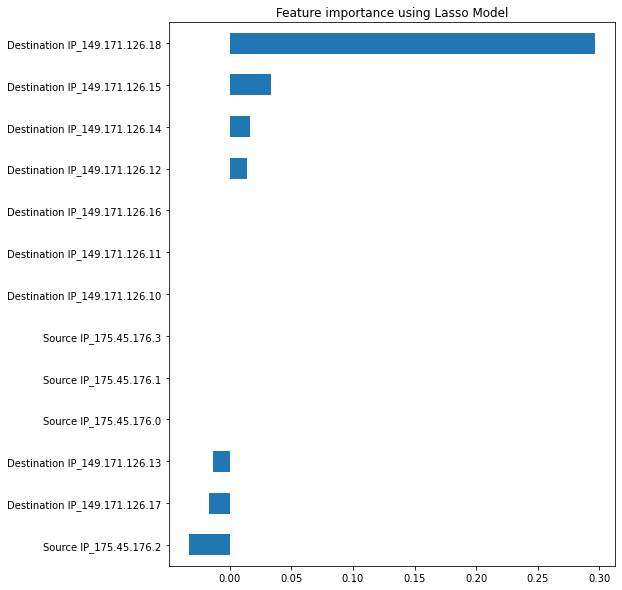

In [53]:
# Visualizing the best/worst features using Lasso Model
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


##### Result:

From Embedded method, we select Destination IP "149.171.126.18" as one of the most important input variable that is related to output/target variable "Generic"

### 3. Feature importance

In order to get the best feature, we also implemented feature importance method.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

In [54]:
# Importing Tree-based classifier to fit in model
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [55]:
# Using inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

[0.10765426 0.09138917 0.04721567 0.08633344 0.05979214 0.0099296
 0.05380351 0.02673056 0.05715779 0.06943063 0.00903411 0.02931831
 0.35221079]


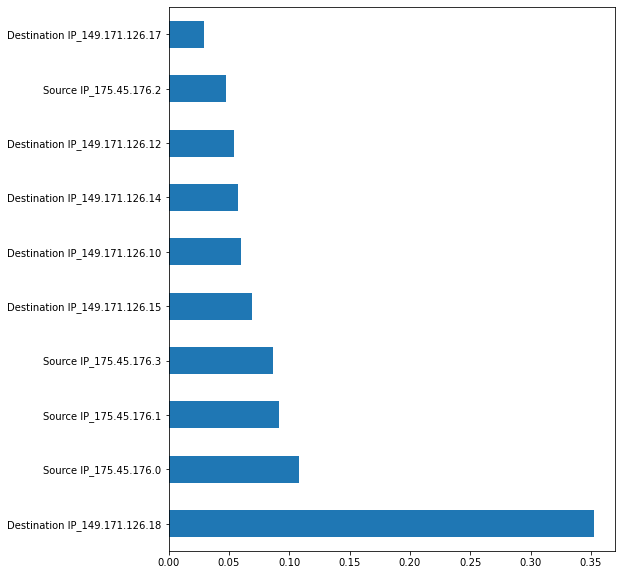

In [56]:
# Plotting the features for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

##### Result:

From Feature Importance method, we select Destination IP "149.171.126.18" as one of the most important input variable that is related to output/target variable "Generic"

## Predictive Modelling and Assessment 

From Feature Engineering, we got that there's a strong relationship between Destination IP "149.171.126.18" and "Generic" type of attack which will be used and predicted further using 3 modeling methods because our data set is "Binary Classification" and assessing the same with Receiver Operating Characteristic (ROC) and Area under the curve (AUC).

We have already defined independent and dependent columns in previous step.


X = corelation_dummy.iloc[:,9:22]                #independent columns



y = corelation_dummy.iloc[:,5]                  #target column i.e Generic

In [57]:
# Spliting the input and output variables as training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [58]:
# Displaying the shape of training and testing dataframes
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(133523, 13)

(133523,)

(44508, 13)

(44508,)

### 1. Logistic Regression

Logistic regression is a statistical analysis method that uses independent variables to predict the dependent variable, just like Linear Regression, but with a difference that the dependent variable should be categorical variable.
Independent variables can be numeric or categorical variables, but the dependent variable will always be categorical

In [59]:
# Implementing logisticRegression function and fitting the both training dataframes
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [60]:
# Creating target variable's prediction with respect to input variable
y_pred=lr.predict(X_test)

# Print
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [61]:
# Creating confusion matrix of testing and predicting the data frames of target variable
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[38503,   885],
       [ 4578,   542]], dtype=int64)

From the confusion matrix it is clear that 38503 falls under True Positive, 885 falls under False Positive, 4578 falls under False Negative, 542 falls under True Negative using Logistic Regression.

<AxesSubplot:>

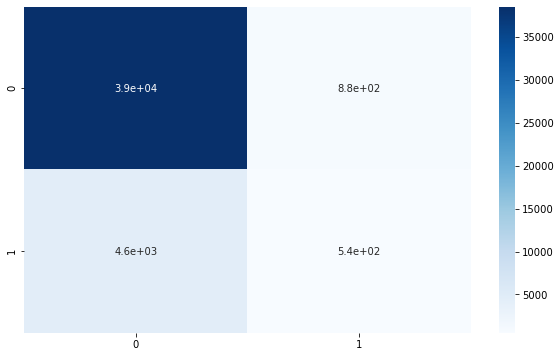

In [62]:
# Plotting the confustion matrix in heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cnf_matrix, annot=True, cmap = "Blues")

In [63]:
# Calculating Accuracy, Precision, Recall, F1, ROC AUC, and Confusion matrix of Logistic Regression model
#  "Micro" Calculate metrics globally by counting the total true positives, false negatives and false positives.
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
precision = precision_score(y_test, y_pred, average='micro')
print('Precision: %f' % precision)
recall = recall_score(y_test, y_pred, average='micro')
print('Recall: %f' % recall)
f1 = f1_score(y_test, y_pred, average='micro')
print('F1 score: %f' % f1)
auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print('ROC AUC: %f' % auc)
print(cnf_matrix)

Accuracy: 0.877258
Precision: 0.877258
Recall: 0.877258
F1 score: 0.877258
ROC AUC: 0.541695
[[38503   885]
 [ 4578   542]]


C:\Users\jinal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


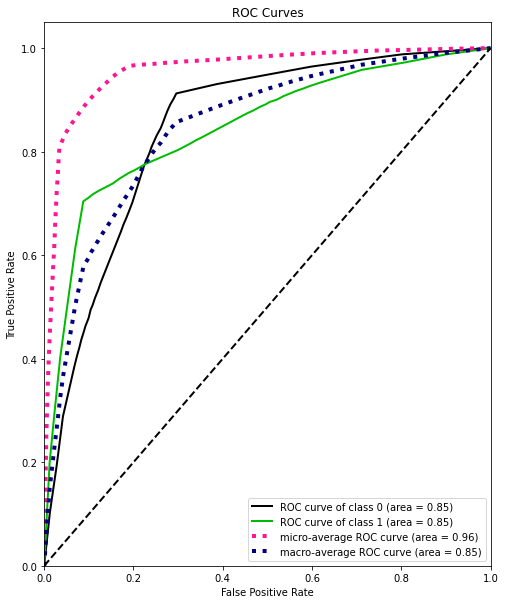

In [64]:
# Plotting the ROC curve i.e. a visual trade-offs between False Positive and True Positive rates
y_true = y_test
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

##### Expalnation: As ROC curve is close to 1 and  values on y axis are higher which states that it has higher number of True positive values therefore we can conclude that it has high accuracy (85%).

### 2. kNN method

K-nearest neighbors (kNN) is a supervised machine learning algorithm that can be used to solve both classification and regression tasks. It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.

In [65]:
# Creating dataframes for implementing kNN method 
A = corelation_dummy.iloc[:, 9:22] # input variable
b = corelation_dummy.iloc[:, 5]
# Splitting the dataset into the Training set and Test set
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.25, random_state = 42)

# We have to scale the attributes. For this we used the StandardScaler from sklearn.
sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

# Fitting classifier to the Training set
classifier_model = KNeighborsClassifier(n_neighbors = 3,metric='euclidean')
model_fit=classifier_model.fit(A_train, b_train)

# Predicting the Test set results
b_pred = classifier_model.predict(A_test)

# Making the Confusion Matrix
cm = confusion_matrix(b_test, b_pred)
cm

array([[37779,  1609],
       [ 3033,  2087]], dtype=int64)

From the confusion matrix it is clear that 37779 falls under True Positive, 1609 falls under False Positive, 3033 falls under False Negative, 2087 falls under True Negative using kNN method.

<AxesSubplot:>

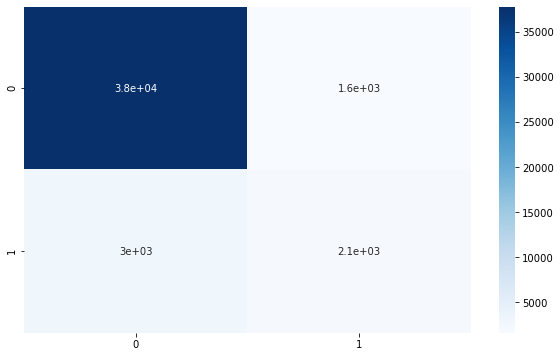

In [66]:
# Plotting the confusion matrix for KnN method
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'Blues')

In [67]:
# Calculating Accuracy, Precision, Recall, F1, ROC AUC, and Confusion matrix of kNN method
#  "Micro" Calculate metrics globally by counting the total true positives, false negatives and false positives.
accuracy_knn = accuracy_score(b_test, b_pred)
print('Accuracy: %f' % accuracy_knn)
precision_knn = precision_score(b_test, b_pred, average='micro')
print('Precision: %f' % precision_knn)
recall_knn = recall_score(b_test, b_pred, average='micro')
print('Recall: %f' % recall_knn)
f1_knn = f1_score(b_test, b_pred, average='micro')
print('F1 score: %f' % f1_knn)
auc_knn = roc_auc_score(b_test, b_pred, multi_class='ovr')
print('ROC AUC: %f' % auc_knn)
print(cm)

Accuracy: 0.895704
Precision: 0.895704
Recall: 0.895704
F1 score: 0.895704
ROC AUC: 0.683384
[[37779  1609]
 [ 3033  2087]]


In [68]:
# Calculating accuracy for k from 1 to 30
for k in range(1,30):
     classifier = KNeighborsClassifier(n_neighbors=k)
     classifier.fit(A_train, b_train)
     b_preds = classifier.predict(A_test)
     print("Accuracy for k =", k, "is:", accuracy_score(b_test, b_preds)) 

Accuracy for k = 1 is: 0.8966028579131842
Accuracy for k = 2 is: 0.8941987957221174
Accuracy for k = 3 is: 0.8957041430754021
Accuracy for k = 4 is: 0.8971196189449088
Accuracy for k = 5 is: 0.8941987957221174
Accuracy for k = 6 is: 0.8971196189449088
Accuracy for k = 7 is: 0.8886716994697582
Accuracy for k = 8 is: 0.8941987957221174
Accuracy for k = 9 is: 0.8957041430754021
Accuracy for k = 10 is: 0.8957041430754021
Accuracy for k = 11 is: 0.8957041430754021
Accuracy for k = 12 is: 0.8957041430754021
Accuracy for k = 13 is: 0.8957041430754021
Accuracy for k = 14 is: 0.8957041430754021
Accuracy for k = 15 is: 0.8957041430754021
Accuracy for k = 16 is: 0.8957041430754021
Accuracy for k = 17 is: 0.8957041430754021
Accuracy for k = 18 is: 0.8986249662981936
Accuracy for k = 19 is: 0.8986249662981936
Accuracy for k = 20 is: 0.8986249662981936
Accuracy for k = 21 is: 0.8986249662981936
Accuracy for k = 22 is: 0.8986249662981936
Accuracy for k = 23 is: 0.8986249662981936
Accuracy for k = 24 

The best k is 18 for kNN method which is too high and computationally expensive.

C:\Users\jinal\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\jinal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


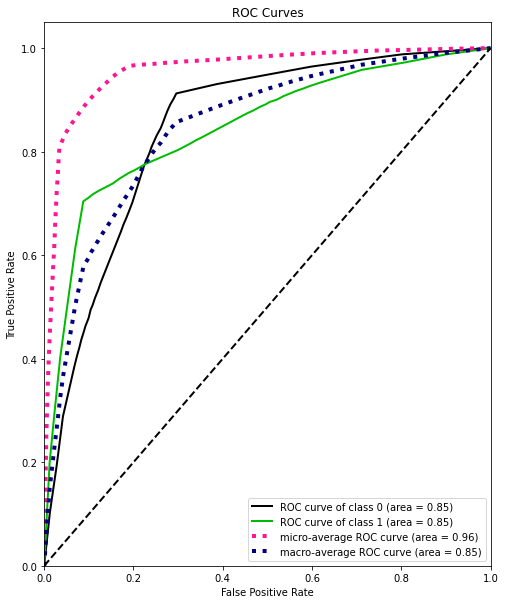

In [69]:
# Plotting the ROC curve i.e. a visual trade-offs between False Positive and True Positive rates
y_true = b_test
y_probas = model.predict_proba(A_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

##### Expalnation: As ROC curve is close to 1 and  values on y axis are higher which states that it has higher number of True positive values therefore we can conclude that it has high accuracy.

### 3. Decision tree

In decsion tree, each node specfices a test on an attribute, each branch descending from that node corresponds to one of the possible values from that attribute. 
We used Decision tree because it handles non-linear data sets effectively and as the k value is too high we planned to use this algorithm for our prediction

In [70]:
# Implementing decion tree classification and fitting the input and output varibles in the tree
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [71]:
# Predicting the target variable
y_pred = dtree.predict(X_test)

In [72]:
# Creating confusion matrix of target variable
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[37978,  1410],
       [ 3062,  2058]], dtype=int64)

From the confusion matrix it is clear that 37978 falls under True Positive, 1410 falls under False Positive, 3062 falls under False Negative, 2058 falls under True Negative using Decision tree classification method.

Text(0.5, 33.0, 'Predicted')

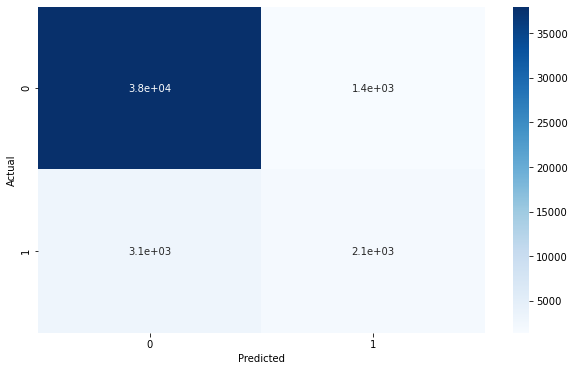

In [73]:
# Plotting confution matrix 
plt.figure(figsize=(10,6))
sns.heatmap(data=cm1, annot=True,  cmap = 'Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [74]:
# Calculating Accuracy, Precision, Recall, F1, ROC AUC, and Confusion matrix of Decision tree classification model
#  "Micro" Calculate metrics globally by counting the total true positives, false negatives and false positives.
accuracy_d = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy_d)
precision_d = precision_score(y_test, y_pred, average='micro')
print('Precision: %f' % precision_d)
recall_d = recall_score(y_test, y_pred, average='micro')
print('Recall: %f' % recall_d)
f1_d = f1_score(y_test, y_pred, average='micro')
print('F1 score: %f' % f1_d)
auc_d = roc_auc_score(y_test, y_pred, multi_class='ovr')
print('ROC AUC: %f' % auc_d)
print(cm1)

Accuracy: 0.899524
Precision: 0.899524
Recall: 0.899524
F1 score: 0.899524
ROC AUC: 0.683078
[[37978  1410]
 [ 3062  2058]]


C:\Users\jinal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


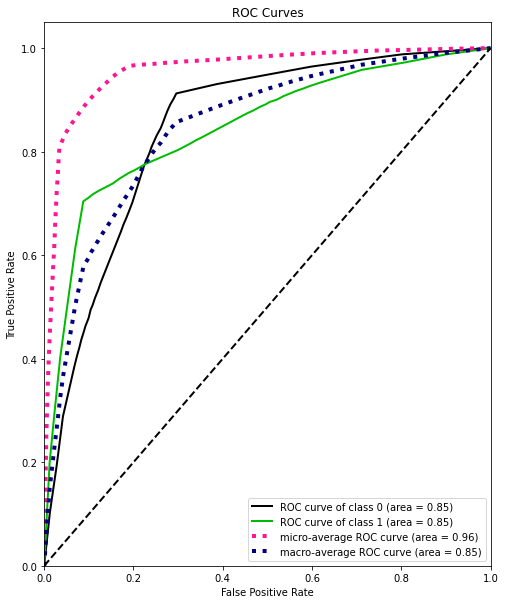

In [75]:
# Plotting the ROC curve i.e. a visual trade-offs between False Positive and True Positive rates
y_true = y_test
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

##### Expalnation: As ROC curve is close to 1 and  values on y axis are higher which states that it has higher number of True positive values therefore we can conclude that it has high accuracy.

## Model Assessment

In [76]:
final_cm = [[cnf_matrix[0], cm[0], cm1[0]],
           [cnf_matrix[1], cm[1], cm1[1]]]
print_all_cms = pd.DataFrame(final_cm, columns = ['Logistic Regression', 'kNN Method', 'Decision Tree'])
print_all_cms

,Logistic Regression,kNN Method,Decision Tree
0,"[38503, 885]","[37779, 1609]","[37978, 1410]"
1,"[4578, 542]","[3033, 2087]","[3062, 2058]"


From the confusion matrix, we can see that Decision Tree has the highest True Positive compared to others. We also take other aspects below for our assessment i.e. Accuracy, Precision, Recall, F1 and AUC for getting the best model.

In [77]:
assessment = [["Accuracy", accuracy, accuracy_knn, accuracy_d],
             ["Precision", precision, precision_knn, precision_d],
             ["Recall", recall, recall_knn, recall_d],
             ["F1", f1, f1_knn, f1_d],
             ["AUC", auc, auc_knn, auc_d]]
assessment_print = pd.DataFrame(assessment, columns = ['Label','Logistic Regression','kNN Method','Decision Tree'])
print(assessment_print)

       Label  Logistic Regression  kNN Method  Decision Tree
0   Accuracy             0.877258    0.895704       0.899524
1  Precision             0.877258    0.895704       0.899524
2     Recall             0.877258    0.895704       0.899524
3         F1             0.877258    0.895704       0.899524
4        AUC             0.541695    0.683384       0.683078


##### Conclusion:

To sum up, we can predict "Generic" type of attack can be most vulnerable to destination machines as we received accuracy of 85%-90% using Logistic regression, kNN method and Decision tree algorithms. The most precise prediction was found to be in Decision tree algorithm with almost 90% of accuracy and precision. We can also, generate model for most vulnerable machines which has the highest correlation (0.47) between source and destination IP, but because we wanted to focus on the type of Attack that can possibly happen in future - we didn't created model based on source and destination IP. 